# Practica 3

In [38]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [39]:
pokemons = pd.read_csv('./DatasetsLab1/pokemon.csv', encoding='latin-1')
pokemons

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


## A) Normalizamos el Dataset

In [40]:
numeric_cols = ['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']
X = pokemons[numeric_cols]

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos
scaler.fit(X)

# Transformar los datos utilizando el scaler ajustado
X_transformed = scaler.transform(X)

# Reemplazar las columnas numéricas en el DataFrame original con los datos transformados
pokemons[numeric_cols] = X_transformed

# Ver los datos transformados
pokemons

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,PONYTA,Fuego,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,TORKOAL,Fuego,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,ARCANINE,Fuego,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,STARMIE,Agua,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,PALKIA,Agua,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,MILOTIC,Agua,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,AZUMARILL,Agua,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,LEAFEON,Planta,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,ABOMASNOW,Planta,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


## B) Calculamos los autovalores y autovectores a partir de la matriz de covarianza

In [41]:
cov_matrix = np.cov(X_transformed.T)

In [42]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [43]:
print("Autovalores: ", eigenvalues)
print("Autovectores: ", eigenvectors)

Autovalores:  [2.62997944 1.55066147 0.16420572 0.47459774 0.71552145 0.78082366]
Autovectores:  [[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]]


### Obtenemos un dataframe con estos datos

#### Ordenar los autovalores de mayor a menor

In [44]:
sorted_idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_idx]

#### Calcular el porcentaje de varianza explicado por cada componente principal y el acumulado

In [45]:
explained_variance_ratio = sorted_eigenvalues / sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#### Crear un DataFrame con los resultados

In [46]:
variance_df = pd.DataFrame({'Componente': range(1, len(eigenvalues)+1),
                            'Porcentaje de Varianza': explained_variance_ratio*100,
                            'Porcentaje Acumulado de Varianza': cumulative_variance_ratio*100})

In [47]:
variance_df

,Componente,Porcentaje de Varianza,Porcentaje Acumulado de Varianza
0,1,41.641341,41.641341
1,2,24.552140,66.193481
2,3,12.363041,78.556522
3,4,11.329090,89.885612
4,5,7.514464,97.400076
5,6,2.599924,100.000000


#### Esta informacion nos quiere decir cuanta informacion contiene cada componente del dataset. El porcentaje acumulado de varianza nos dice cuanta infornacion tenemos en total. Ejemplo: si solo usamos 1 componente, tenemos el 41.64% de informacion. Si usamos 2 componentes, tenemos el 66.19%. Si usamos 5 componentes, tenemos el 97.40%
#### El porcentaje de varianza nos dice la informacion que tiene cada componente. Ejemplo: la componente 1 tiene el 41.64% de informacion, la componente 3 tiene 11.32% de informacion
#### Con dos componentes perdemos el 100 - 66.19 ,es decir, el 33.81% de informacion. 
#### Con tres componentes presentamos el 78.55% de la informacion

## D) Representacion grafica con libreria scikit-learn

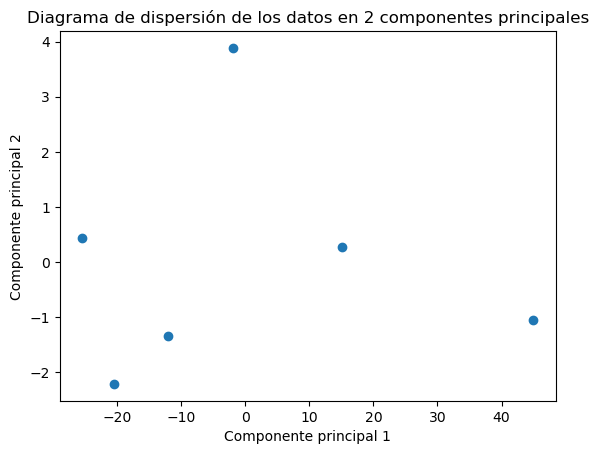

In [50]:
# Reducción de dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
pca.fit(variance_df)
X_pca = pca.transform(variance_df)

# Creación del diagrama de dispersión
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Diagrama de dispersión de los datos en 2 componentes principales')
plt.show()